**4/17/23**

The purpose of this notebook page is to analyze and graph data from polyamine assays.

In [1]:
from elliot_utils import *
from scipy import stats

In [2]:
analysisPath = Path.cwd().joinpath('analysis_files/polyamine_assays/')
figPath = Path.cwd().joinpath('figures/polyamine_assays/')

In [3]:
# Graph the combined results from the pilot assay on 4/4/23, the follow-up on 4/7/23, and the follow-up-follow-up on 4/11/23
data41123 = pd.read_csv(analysisPath.joinpath('4-11-23.csv'))

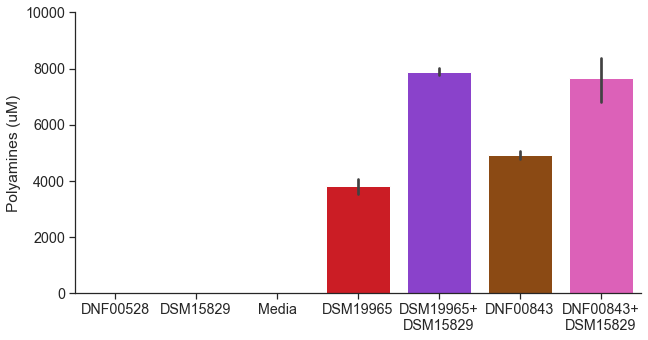

In [4]:
plot41123 = sns.catplot(data=data41123, x='Isolate', y='Polyamines (uM)', kind='bar', aspect=1.8)
plot41123.set(xlabel='', ylim=(0, 10000))
plot41123.savefig(figPath.joinpath('4-11-23.png'), bbox_inches='tight', dpi=300)

In [5]:
# Perform statistical analysis on the results to confirm that the concentration of polyamines in the cocultures is higher than in the monocultures
# First pull the data I need out of the dataframe
statsData = {'DSM19965':[], 'DNF00843':[], 'DSM19965+DSM15829':[], 'DNF00843+DSM15829':[]}
for index, row in data41123.iterrows():
    polyamines = row['Polyamines (uM)']
    isolate = row['Isolate']
    if isolate == 'DSM19965':
        statsData['DSM19965'].append(polyamines)
    elif isolate == 'DNF00843':
        statsData['DNF00843'].append(polyamines)
    elif isolate == 'DSM19965+\nDSM15829':
        statsData['DSM19965+DSM15829'].append(polyamines)
    elif isolate == 'DNF00843+\nDSM15829':
        statsData['DNF00843+DSM15829'].append(polyamines)

In [7]:
# Test for D. micraerophilus DSM19965
stats.ttest_ind(statsData['DSM19965'], statsData['DSM19965+DSM15829'], equal_var=False)

Ttest_indResult(statistic=-23.22080868119469, pvalue=0.00016956380041806192)

In [8]:
# Test for D. micraerophilus DNF00843
stats.ttest_ind(statsData['DNF00843'], statsData['DNF00843+DSM15829'], equal_var=False)

Ttest_indResult(statistic=-5.817460306189713, pvalue=0.024352341444934693)